In [20]:
# importar as bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 


In [25]:
# importar o dataframe
df = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Verificar as primeiras 10 linhas do dataframe
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [22]:
# Verificar as informações do dataframe
df.info()

# Verificar as estatísticas do dataframe
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [18]:
# Verificar se há valores nulos no dataframe
df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [40]:
# Verificar o tamanho do dataframe
df.shape

# Verificar as colunas do dataframe
df.columns

# Verificar os tipos de dados das colunas
df.dtypes


gender                                    object
SeniorCitizen                              int64
Partner                                   object
Dependents                                object
tenure                                     int64
PhoneService                              object
MultipleLines                             object
OnlineSecurity                            object
OnlineBackup                              object
DeviceProtection                          object
TechSupport                               object
StreamingTV                               object
StreamingMovies                           object
PaperlessBilling                          object
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
Contract_One year                           bool
Contract_Two year                           bool
PaymentMethod_Credit card (automatic)       bool
PaymentMethod_Electr

In [ ]:
# Avaliar o desequilíbrio entre "Yes" e "No"
df['Churn'].value_counts(normalize=True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

In [34]:
# Converter TotalCharges para numérico, tratando erros como NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Preencher valores NaN com a mediana, sem inplace
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

# Verificar os resultados
print(df['TotalCharges'].isnull().sum())  # Deve ser 0
print(df['TotalCharges'].head())

0
0      29.85
1    1889.50
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: float64


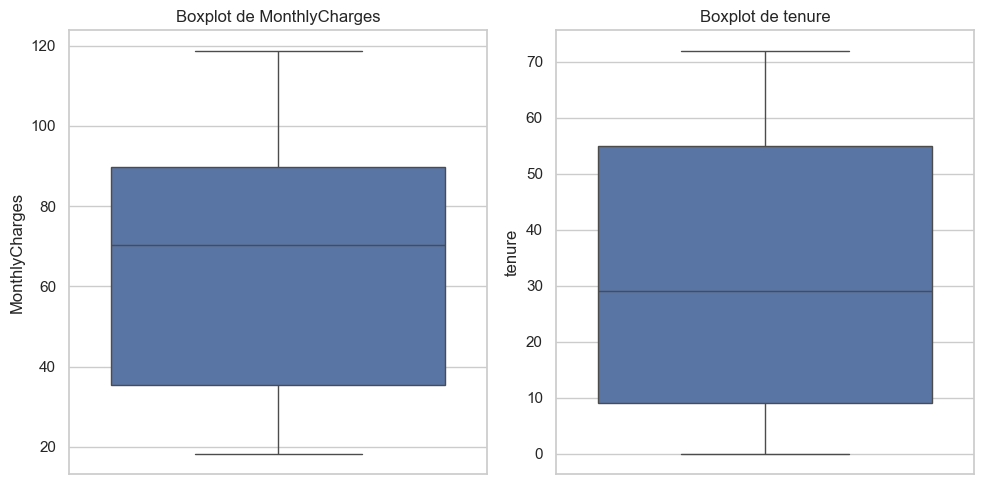

In [35]:
# Configurar o estilo do gráfico
sns.set(style="whitegrid")

# Criar boxplots para MonthlyCharges e tenure
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['MonthlyCharges'])
plt.title('Boxplot de MonthlyCharges')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['tenure'])
plt.title('Boxplot de tenure')

plt.tight_layout()
plt.show()

In [36]:
# Garantir que MonthlyCharges e tenure sejam numéricos
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')
df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce')

# Calcular outliers para MonthlyCharges
Q1_monthly = df['MonthlyCharges'].quantile(0.25)
Q3_monthly = df['MonthlyCharges'].quantile(0.75)
IQR_monthly = Q3_monthly - Q1_monthly
lower_bound_monthly = Q1_monthly - 1.5 * IQR_monthly
upper_bound_monthly = Q3_monthly + 1.5 * IQR_monthly

outliers_monthly = df[(df['MonthlyCharges'] < lower_bound_monthly) | (df['MonthlyCharges'] > upper_bound_monthly)]
print(f"Outliers em MonthlyCharges: {len(outliers_monthly)}")
print(outliers_monthly[['customerID', 'MonthlyCharges']])

# Calcular outliers para tenure
Q1_tenure = df['tenure'].quantile(0.25)
Q3_tenure = df['tenure'].quantile(0.75)
IQR_tenure = Q3_tenure - Q1_tenure
lower_bound_tenure = Q1_tenure - 1.5 * IQR_tenure
upper_bound_tenure = Q3_tenure + 1.5 * IQR_tenure

outliers_tenure = df[(df['tenure'] < lower_bound_tenure) | (df['tenure'] > upper_bound_tenure)]
print(f"Outliers em tenure: {len(outliers_tenure)}")
print(outliers_tenure[['customerID', 'tenure']])

# Exibir os quartis e limites para depuração
print(f"MonthlyCharges - Q1: {Q1_monthly}, Q3: {Q3_monthly}, IQR: {IQR_monthly}")
print(f"MonthlyCharges - Limite inferior: {lower_bound_monthly}, Limite superior: {upper_bound_monthly}")
print(f"tenure - Q1: {Q1_tenure}, Q3: {Q3_tenure}, IQR: {IQR_tenure}")
print(f"tenure - Limite inferior: {lower_bound_tenure}, Limite superior: {upper_bound_tenure}")

Outliers em MonthlyCharges: 0
Empty DataFrame
Columns: [customerID, MonthlyCharges]
Index: []
Outliers em tenure: 0
Empty DataFrame
Columns: [customerID, tenure]
Index: []
MonthlyCharges - Q1: 35.5, Q3: 89.85, IQR: 54.349999999999994
MonthlyCharges - Limite inferior: -46.02499999999999, Limite superior: 171.375
tenure - Q1: 9.0, Q3: 55.0, IQR: 46.0
tenure - Limite inferior: -60.0, Limite superior: 124.0


In [ ]:
# Transformar variáveis categóricas em variáveis numéricas
df = pd.get_dummies(df, columns=['Contract', 'PaymentMethod', 'InternetService'], drop_first=True)

In [ ]:
# Transformar variáveis categóricas em variáveis numéricas
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

In [ ]:
# Remover a coluna customerID
df.drop('customerID', axis=1, inplace=True)

In [ ]:
# Separar as variáveis independentes (X) e dependente (y)
X = df.drop('Churn', axis=1)
y = df['Churn']